# section 1

In [17]:
import pyopenms as ms
import math 
import matplotlib.pyplot as plt 

In [2]:
help(ms.Constants)

Help on module pyopenms.Constants in pyopenms:

NAME
    pyopenms.Constants

DESCRIPTION
    # @brief Mathematical and physical constants namespace.
    # 
    # This namespace contains definitions for some basic mathematical and physical constants.
    # All constants are double precision.

DATA
    AVOGADRO = 6.0221367e+23
    BOHR_RADIUS = 5.29177249e-11
    BOLTZMANN = 1.380657e-23
    C13C12_MASSDIFF_U = 1.0033548378
    CAL_PER_JOULE = 0.2390057361376673
    DEG_PER_RAD = 57.29577951308232
    E = 2.718281828459045
    ELECTRON_MASS = 9.1093897e-31
    ELECTRON_MASS_U = 0.0005485799042984105
    ELEMENTARY_CHARGE = 1.60217738e-19
    EPSILON = 1e-06
    F = 96485.31200007845
    FARADAY = 96485.31200007845
    FINE_STRUCTURE_CONSTANT = 0.00729735
    FRAGMENT_ANNOTATION_USERPARAM = 'fragment_annotation'
    GAS_CONSTANT = 8.314505189811898
    GRAVITATIONAL_CONSTANT = 6.67259e-11
    JOULE_PER_CAL = 4.184
    MM_PER_INCH = 25.4
    MOL = 6.0221367e+23
    M_PER_FOOT = 3.048
    N

In [3]:
print('avogadro is ', ms.Constants.AVOGADRO)

avogadro is  6.0221367e+23


In [4]:
print('electron mass is ',ms.Constants.ELECTRON_MASS)

electron mass is  9.1093897e-31


In [5]:
edb=ms.ElementDB()

In [6]:
edb.hasElement('Cl')

True

In [7]:
edb.hasElement('Na')

True

In [8]:
carbon=edb.getElement('C')
print(carbon.getName())
print(carbon.getSymbol())
print(carbon.getMonoWeight())
print(carbon.getAverageWeight())
isotopes_C=carbon.getIsotopeDistribution()
print('one mol of carbon weights %f gram' % carbon.getAverageWeight())
print('one mol of 12C weights %f gram' % carbon.getMonoWeight())

Carbon
C
12.0
12.0107358985
one mol of carbon weights 12.010736 gram
one mol of 12C weights 12.000000 gram


In [9]:
print(edb.hasElement('O'))
oxgyen=edb.getElement('O')
isotopes_O=oxgyen.getIsotopeDistribution()

True


In [10]:
print(edb.hasElement('S'))
surfur=edb.getElement('S')
isotopes_S=surfur.getIsotopeDistribution()

True


In [11]:
oxgyen_Dist={'mass':[], 'abundance':[]}
for iso in isotopes_O.getContainer():
    oxgyen_Dist['mass'].append(iso.getMZ())
    oxgyen_Dist['abundance'].append(iso.getIntensity()*100)
print('mass of O is ',oxgyen_Dist['mass'])
print('abundance of O is ', oxgyen_Dist['abundance'])

mass of O is  [15.994915, 16.999132, 17.999169]
abundance of O is  [99.75699782371521, 0.03800000122282654, 0.20500000100582838]


In [12]:
surfur_Dist={'mass':[], 'abundance':[]}
for iso in isotopes_S.getContainer():
    surfur_Dist['mass'].append(iso.getMZ())
    surfur_Dist['abundance'].append(iso.getIntensity()*100)
print('mass of S is ',surfur_Dist['mass'])
print('abundance of S is ', surfur_Dist['abundance'])

mass of S is  [31.97207073, 32.971458, 33.967867, 35.967081]
abundance of S is  [94.92999911308289, 0.7600000128149986, 4.2899999767541885, 0.019999999494757503]


In [13]:
carbon_Dist={'mass':[], 'abundance':[]}
for iso in isotopes_C.getContainer():
    carbon_Dist['mass'].append(iso.getMZ())
    carbon_Dist['abundance'].append(iso.getIntensity()*100)
print('mass of C is ',carbon_Dist['mass'])
print('abundance of C is ', carbon_Dist['abundance'])

mass of C is  [12.0, 13.003355]
abundance of C is  [98.9300012588501, 1.0700000450015068]


In [14]:
iso_C=isotopes_C.getContainer()
different_isotope_carbon=iso_C[1].getMZ() - iso_C[0].getMZ()
iso_S=isotopes_S.getContainer()
different_isotope_surfur=iso_S[1].getMZ() - iso_S[0].getMZ()
print('different_isotope_carbon= ',different_isotope_carbon)
print('different_isotope_surfur= ',different_isotope_surfur)
print('relative deviation= ',100*(different_isotope_carbon-different_isotope_surfur)/different_isotope_carbon)

different_isotope_carbon=  1.0033550000000009
different_isotope_surfur=  0.9993872699999997
relative deviation=  0.3954462777383045


This difference can actually be measured by `a high resolution mass spectrometric instrument` and is used in `the tandem mass tag (TMT)` labelling strategy.

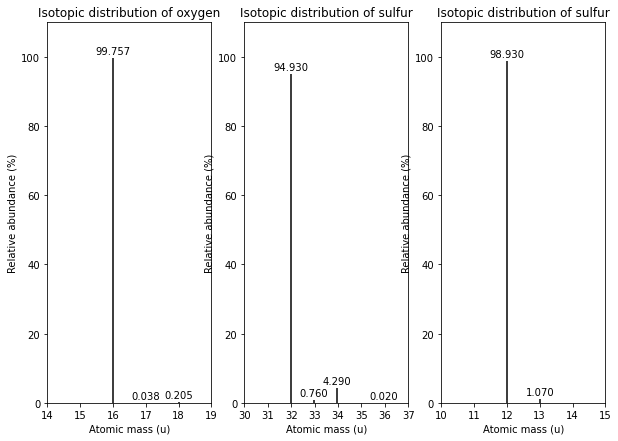

In [38]:
# very simple overlappping correction of annotations
def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxgyen_Dist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,3,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(surfur_Dist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,3,3)
plt.title("Isotopic distribution of sulfur")
plotDistribution(carbon_Dist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [15]:
#For the same reason, the helium atom has a slightly lower mass than the mass of its constituent particles
#(two protons, two neutrons and two electrons)
helium=edb.getElement('He')
isotopes_He= helium.getIsotopeDistribution()
mass_sum =2*ms.Constants.PROTON_MASS_U+ 2*ms.Constants.ELECTRON_MASS_U+2*ms.Constants.NEUTRON_MASS_U
helium4=isotopes_He.getContainer()[1].getMZ()
print ("Sum of masses of 2 protons, neutrons and electrons:", mass_sum)
print ("Mass of He4:", helium4)
print('different of masses= ',100*(mass_sum-helium4)/mass_sum)

Sum of masses of 2 protons, neutrons and electrons: 4.032979924670597
Mass of He4: 4.00260325415
different of masses=  0.7532065888743016


### Molecular Formulae

In [16]:
sadum= ms.EmpiricalFormula('NaOH')
colar= ms.EmpiricalFormula('HCl')
salt= sadum+colar
print(salt.toString())
print(salt.getElementalComposition())
print(salt.getElementalComposition()[b'H'],'hydrogen atom')

Cl1H2Na1O1
{b'Cl': 1, b'H': 2, b'Na': 1, b'O': 1}
2 hydrogen atom


In [44]:
methanol = ms.EmpiricalFormula('CH3OH')
ethanol = ms.EmpiricalFormula('CH2')+methanol
methanol_isoDist={'mass':[],'abundance':[]}
ethanol_isoDist={'mass':[],'abundance':[]}
# CoarseIsotopePatternGenerator which produces unit mass isotope patterns
print('coarse isotope distribution: ')
isotopes=ethanol.getIsotopeDistribution(ms.CoarseIsotopePatternGenerator(4))
prop_sum= sum([iso.getIntensity() for iso in isotopes.getContainer()])
print('this covers' ,prop_sum,'probability')
for iso in isotopes.getContainer():
    print('isotope',iso.getMZ(),'has bundance',iso.getIntensity()*100,'%')
    ethanol_isoDist['mass'].append(iso.getMZ())
    ethanol_isoDist['abundance'].append(iso.getIntensity()*100)

# FineIsotopePatternGenerator which is based on the IsoSpec algorithm 
print('find iostopes distribution :')
isotopes=ethanol.getIsotopeDistribution(ms.FineIsotopePatternGenerator(1e-3))
prop_sum1= sum([iso.getIntensity() for iso in isotopes.getContainer()])
print('this covers' ,prop_sum1,'probability')
for iso in isotopes.getContainer():
    print('isotope',iso.getMZ(),'has bundance',iso.getIntensity()*100,'%')
    ethanol_isoDist['mass'].append(iso.getMZ())
    ethanol_isoDist['abundance'].append(iso.getIntensity()*100)

coarse isotope distribution: 
this covers 1.000000014755642 probability
isotope 46.0418651914 has bundance 97.56630063056946 %
isotope 47.045220029199996 has bundance 2.21499539911747 %
isotope 48.048574867 has bundance 0.2142168115824461 %
isotope 49.0519297048 has bundance 0.004488634294830263 %
find iostopes distribution :
this covers 0.9994461630121805 probability
isotope 46.0418651914 has bundance 97.5662887096405 %
isotope 47.0452201914 has bundance 2.110501006245613 %
isotope 47.0481419395 has bundance 0.06732848123647273 %
isotope 48.046119191399995 has bundance 0.20049810409545898 %


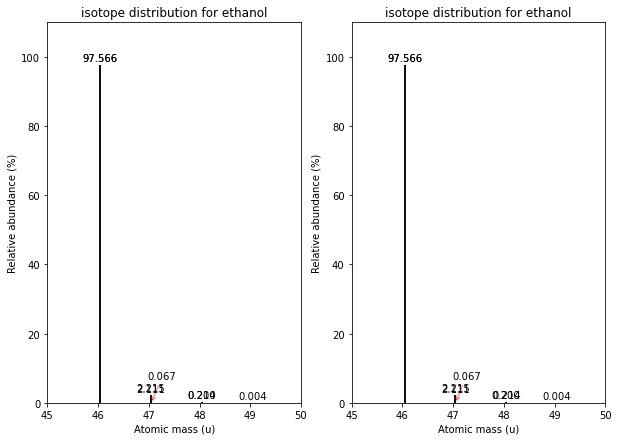

In [45]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('isotope distribution for ethanol')
plotDistribution(ethanol_isoDist)
plt.xlabel('Atomic mass (u)')
plt.ylabel('Relative abundance (%)')
plt.subplot(1,2,2)
plt.title('isotope distribution for ethanol')
plotDistribution(ethanol_isoDist)
plt.xlabel('Atomic mass (u)')
plt.ylabel('Relative abundance (%)')

plt.savefig('isotope_distribution_for_ethanol.png')

In [46]:
# FineIsotopePatternGenerator which is based on the IsoSpec algorithm 
print('find iostopes distribution :')
# decrease our cutoff and ask for more isotopes to be calculated
isotopes=ethanol.getIsotopeDistribution(ms.FineIsotopePatternGenerator(1e-6))
prop_sum1= sum([iso.getIntensity() for iso in isotopes.getContainer()])
print('this covers' ,prop_sum1,'probability')
for iso in isotopes.getContainer():
    print('isotope',iso.getMZ(),'has bundance',iso.getIntensity()*100,'%')
    ethanol_isoDist['mass'].append(iso.getMZ())
    ethanol_isoDist['abundance'].append(iso.getIntensity()*100)

find iostopes distribution :
this covers 0.9999993089130612 probability
isotope 46.0418651914 has bundance 97.5662887096405 %
isotope 47.0452201914 has bundance 2.110501006245613 %
isotope 47.046082191400004 has bundance 0.03716550418175757 %
isotope 47.0481419395 has bundance 0.06732848123647273 %
isotope 48.046119191399995 has bundance 0.20049810409545898 %
isotope 48.0485751914 has bundance 0.011413302854634821 %
isotope 48.0494371914 has bundance 0.0008039440217544325 %
isotope 48.0514969395 has bundance 0.0014564131561201066 %
isotope 49.049474191399995 has bundance 0.004337066275184043 %
isotope 49.0523959395 has bundance 0.00013835959862262825 %


In [47]:
print('coarse isotope distribution: ')
isotopes=ethanol.getIsotopeDistribution(ms.CoarseIsotopePatternGenerator(5,True))
prop_sum= sum([iso.getIntensity() for iso in isotopes.getContainer()])
print('this covers' ,prop_sum,'probability')
for iso in isotopes.getContainer():
    print('isotope',iso.getMZ(),'has bundance',iso.getIntensity()*100,'%')
    ethanol_isoDist['mass'].append(iso.getMZ())
    ethanol_isoDist['abundance'].append(iso.getIntensity()*100)

coarse isotope distribution: 
this covers 0.9999999753596569 probability
isotope 46.0 has bundance 97.56627082824707 %
isotope 47.0 has bundance 2.214994840323925 %
isotope 48.0 has bundance 0.214216741733253 %
isotope 49.0 has bundance 0.0044886332034366205 %
isotope 50.0 has bundance 2.64924580051229e-05 %


## Amino acid 

In [55]:
lys=ms.ResidueDB().getResidue("Lysine")
print(lys.getName())
print(lys.getThreeLetterCode())
print(lys.getOneLetterCode())
print(lys.getAverageWeight())
print(lys.getMonoWeight())
print(lys.getPka())
print(lys.getFormula().toString())

Lysine
Lys
K
146.18788276708443
146.1055284466
2.16
C6H14N2O2


In [60]:
ox=ms.ModificationsDB().getModification('Oxidation')
print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (Y)
Oxidation or Hydroxylation
O1


In [67]:
isotopes=ox.getDiffFormula().getIsotopeDistribution(ms.CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print(iso.getMZ(),":",iso.getIntensity())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284


## RiboNucleotide

In [70]:
uridine=ms.RibonucleotideDB().getRibonucleotide(b"U")
print(uridine.getName())
print(uridine.getCode())
print(uridine.getAvgMass())
print(uridine.getMonoMass())
print(uridine.getFormula().toString())
print(uridine.isModified())
methyladenosine=ms.RibonucleotideDB().getRibonucleotide(b"m1A")
print(methyladenosine.getName())
print(methyladenosine.isModified())

uridine
U
244.2043
244.0695
C9H12N2O6
False
1-methyladenosine
True


# section3

## Amino Acid Sequences

In [77]:
# create AAsequence object from string 
seq=ms.AASequence.fromString('DFPIANGER')
prefix=seq.getPrefix(4)
suffix=seq.getSuffix(5)
concat=seq+seq
print("seq :", seq)
print("prefix: ",prefix)
print("suffix: ",suffix)
print("concatenated: ",concat)
mwfull=seq.getMonoWeight()
mprecursor= seq.getMonoWeight(ms.Residue.ResidueType.Full,2)
# we can calculate mass-over-charge manually
mz=seq.getMonoWeight(ms.Residue.ResidueType.Full,2)
# or simply by
mz=seq.getMZ(2)
print()
print('monoisotope mass of peptide [M] is ', mwfull)
print('monoisotope mass of peptide precursor [M+2H]2+ is ',mprecursor)
print('monoisotope m/z of [M+2H]2+ is ', mz)

seq : DFPIANGER
prefix:  DFPI
suffix:  ANGER
concatenated:  DFPIANGERDFPIANGER

monoisotope mass of peptide [M] is  1017.4879641373001
monoisotope mass of peptide precursor [M+2H]2+ is  1019.5025170708421
monoisotope m/z of [M+2H]2+ is  509.7512585354211


In [78]:
print('the peptide ', str(seq),"consist of the following amino acids")
for aa in seq:
    print(aa.getName() ,":",aa.getMonoWeight())

the peptide  DFPIANGER consist of the following amino acids
Aspartate : 133.0375092233
Phenylalanine : 165.07897935090003
Proline : 115.06332928709999
Isoleucine : 131.0946294147
Alanine : 89.0476792233
Asparagine : 132.0534932552
Glycine : 75.0320291595
Glutamate : 147.0531592871
Arginine : 174.1116764466


In [87]:
my_seq=ms.AASequence.fromString("C[143]PKCK(Label:13C(6)15N(2))CR")
if my_seq.hasNTerminalModification():
    print('NTerminalModification',my_seq.getNTerminalModification().getFullId())
if my_seq.hasCTerminalModification():
    print('CTerminalModification()',my_seq.getCTerminalModification().getFullId())
for aa in seq:
    if (aa.isModified()):
        print(aa.getName(),":",aa.getMonoWeight(),":",aa.getModificationName())
    else:
        print(aa.getName(),":",aa.getMonoWeight())

NTerminalModification Pyro-carbamidomethyl (N-term C)
Aspartate : 133.0375092233
Phenylalanine : 165.07897935090003
Proline : 115.06332928709999
Isoleucine : 131.0946294147
Alanine : 89.0476792233
Asparagine : 132.0534932552
Glycine : 75.0320291595
Glutamate : 147.0531592871
Arginine : 174.1116764466


In [88]:
# Molecular formula
seq_formula=seq.getFormula()
print(f'peptide {seq} has molecular formula: {seq_formula}')

peptide DFPIANGER has molecular formula: C44H67N13O15


## Isotope patterns

In [94]:
# coarse isotope distribution 
coarse_isotope=seq_formula.getIsotopeDistribution(ms.CoarseIsotopePatternGenerator(6))
for iso in coarse_isotope.getContainer():
    print(f"isotope {iso.getMZ()} has abundance {iso.getIntensity()*100}%")

isotope 1017.4879641373001 has abundance 56.8165123462677%
isotope 1018.4913189751001 has abundance 30.52913248538971%
isotope 1019.4946738129 has abundance 9.802104532718658%
isotope 1020.4980286507001 has abundance 2.3292062804102898%
isotope 1021.5013834885001 has abundance 0.4492596257477999%
isotope 1022.5047383263001 has abundance 0.07378293084912002%


In [95]:
# fine isotope distribution 
fine_isotope=seq_formula.getIsotopeDistribution(ms.FineIsotopePatternGenerator(0.01))
for iso in fine_isotope.getContainer():
    print(f"isotope {iso.getMZ()} has abundance {iso.getIntensity()*100}%")

isotope 1017.4879641373001 has abundance 56.80969953536987%
isotope 1018.4849991373001 has abundance 2.7278145775198936%
isotope 1018.4913191373001 has abundance 27.035287022590637%
isotope 1018.4921811373001 has abundance 0.3246041014790535%
isotope 1018.4942408854 has abundance 0.4377691075205803%
isotope 1019.4883541373001 has abundance 1.2981452979147434%
isotope 1019.4922181373001 has abundance 1.7511537298560143%
isotope 1019.4946741373 has abundance 6.286735832691193%
isotope 1019.4975958854001 has abundance 0.2083308296278119%
isotope 1020.4917091373001 has abundance 0.3018683288246393%
isotope 1020.4955731373002 has abundance 0.833360105752945%
isotope 1020.4980291373 has abundance 0.9519387967884541%
isotope 1021.4989281373 has abundance 0.1937880413606763%


isotope 1017.4879641373001 has bundance 56.8165123462677 %
isotope 1018.4913189751001 has bundance 30.52913248538971 %
isotope 1019.4946738129 has bundance 9.802104532718658 %
isotope 1020.4980286507001 has bundance 2.3292062804102898 %
isotope 1021.5013834885001 has bundance 0.4492596257477999 %
isotope 1022.5047383263001 has bundance 0.07378293084912002 %
isotope 1017.4879641373001 has bundance 56.80969953536987 %
isotope 1018.4849991373001 has bundance 2.7278145775198936 %
isotope 1018.4913191373001 has bundance 27.035287022590637 %
isotope 1018.4921811373001 has bundance 0.3246041014790535 %
isotope 1018.4942408854 has bundance 0.4377691075205803 %
isotope 1019.4883541373001 has bundance 1.2981452979147434 %
isotope 1019.4922181373001 has bundance 1.7511537298560143 %
isotope 1019.4946741373 has bundance 6.286735832691193 %
isotope 1019.4975958854001 has bundance 0.2083308296278119 %
isotope 1020.4917091373001 has bundance 0.3018683288246393 %
isotope 1020.4955731373002 has bundanc

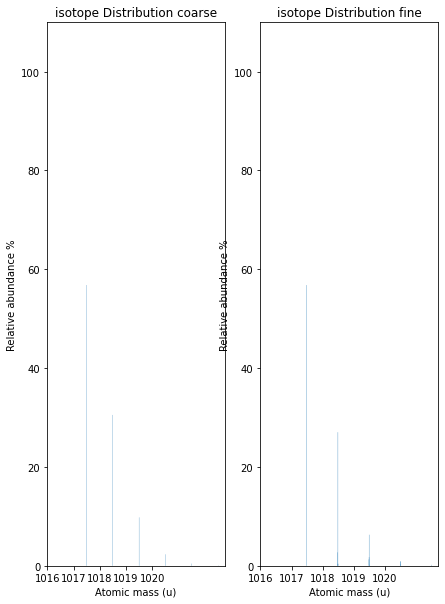

In [99]:
def plotplotDistribution(isotope_Distribution,title="isotope Distribution"):
    plt.title(title)
    distribution={'mass':[],'abundance':[]}
    for iso in isotope_Distribution.getContainer():
        print('isotope',iso.getMZ(),'has bundance',iso.getIntensity()*100,'%')
        distribution['mass'].append(iso.getMZ())
        distribution['abundance'].append(iso.getIntensity()*100)
    bars=plt.bar( distribution['mass'],distribution['abundance'],width=0.01,snap=False)
    plt.ylim([0,110])
    plt.xticks(range(math.ceil(distribution['mass'][0])-2,
                   math.ceil(distribution['mass'][1])+2))
    plt.xlabel('Atomic mass (u)')
    plt.ylabel('Relative abundance %')
    
plt.figure(figsize=(7,10))
plt.subplot(121)
plotplotDistribution(coarse_isotope,'isotope Distribution coarse')
plt.subplot(122)
plotplotDistribution(fine_isotope, 'isotope Distribution fine')


## Fragment ions

In [103]:
suffix= seq.getSuffix(3)
y3_formula= suffix.getFormula(ms.Residue.ResidueType.YIon,2)

print(suffix.getMonoWeight(ms.Residue.ResidueType.YIon,2)/2.0)#correct
print(suffix.getMonoWeight(ms.Residue.ResidueType.XIon,2)/2.0)#correct
print(suffix.getMonoWeight(ms.Residue.ResidueType.BIon,2)/2.0)#incorrect
print()
print('y3 ion sequence',suffix)
print("y3 mz",suffix.getMonoWeight(ms.Residue.ResidueType.YIon,2)/2.0 )
print("y3 molecular formula ",y3_formula)

181.09514384957103
194.08477631767101
172.08986131767102

y3 ion sequence GER
y3 mz 181.09514384957103
y3 molecular formula  C13H24N6O6


## Task  different masses

In [58]:
sum_=0
seq = ms.AASequence.fromString("VAKA")
for aa in seq:
    sum_+=aa.getMonoWeight()
sum_

441.2798662441

In [59]:
seq=ms.AASequence.fromString("VAKA")
total=seq.getMonoWeight()
total

387.2481710527

In [62]:
total==sum_

False

# section 4

## Modified Sequences

In [105]:
seq=ms.AASequence.fromString('PEPTIDESEKUEM(Oxidation)CER')
print(seq.toUnmodifiedString())
print(seq.toString())
print(seq.toUniModString())
print(seq.toBracketString())
print(seq.toBracketString(False))
print()
print(ms.AASequence.fromString('DFPIAM(UniMod:35)GER'))
print(ms.AASequence.fromString('DFPIAM[+16]GER'))
print(ms.AASequence.fromString('DFPIAM[+15.99]GER'))
print(ms.AASequence.fromString('DFPIAM[147]GER'))
print(ms.AASequence.fromString('DFPIAM[147.035405]GER'))

PEPTIDESEKUEMCER
PEPTIDESEKUEM(Oxidation)CER
PEPTIDESEKUEM(UniMod:35)CER
PEPTIDESEKUEM[147]CER
PEPTIDESEKUEM[147.03540001709996]CER

DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER


In [106]:
s=ms.AASequence.fromString('.(Dimethyl)DFPIAMGER.')
print(s,s.hasNTerminalModification())
s=ms.AASequence.fromString('.DFPIAMGER.(Label:18O(2))')
print(s,s.hasCTerminalModification())
s=ms.AASequence.fromString('.DFPIAMGER(Phospho).')
print(s,s.hasCTerminalModification())

.(Dimethyl)DFPIAMGER True
DFPIAMGER.(Label:18O(2)) True
DFPIAMGER(Phospho) False


## Proteins and FASTA files

In [112]:
bsa=ms.FASTAEntry()
bsa.sequence="MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE"
bsa.description ="BSA Bovine Albumin (partial sequence)"
bsa.identifier="BSA"
alb=ms.FASTAEntry()
alb.sequence="MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE"
alb.description="ALB Human Albumin (partial sequence)"
alb.identifier="ALB"
entries=[bsa,alb]
f=ms.FASTAFile()
f.store("example.fasta",entries)

In [114]:
entries2=[]
f=ms.FASTAFile()
f.load("example.fasta",entries2)
print(len(entries2))
for e in entries2:
    print(e.identifier,e.sequence)

2
BSA MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE
ALB MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE


## Task Proteolytic Digestion with Trypsin for Yeast

In [128]:
dig = ms.ProteaseDigestion()
dig.getEnzymeName()
bsa = "".join([l.strip() for l in open("uniprot-yourlist_M202111205BF3C56A578D7D6DFD1FC81EE5DA77302FCEBC7.fasta").readlines()[1:]])
bsa = ms.AASequence.fromString(bsa)
# create all digestion products
result = []
dig.digest(bsa, result)
for s in result:
    print(s.toString())
len(result) 

MYSWK
SK
FK
FGK
SK
EEK
EAK
HSGFFHSSK
K
EEQQNNQATAGEHDASITR
SSLDR
K
GTINPSNSSVVPVR
VSYDASSSTSTVR
DSNGGNSENTNSSQNLDETANIGSTGTPNDATSSSGMMTIK
VYNGDDFILPFPITSSEQILNK
LLASGVPPPHK
EISK
EVDALIAQLSR
VQIK
NQGPADEDLISSESAAK
FIPSTIMLPGSSTLNPLLYFTIEFDNTVATIEAEYGTIAKPGFNK
ISTFDVTR
K
LPYLK
IDVFAR
IPSILLPSK
TWQQEMGLQDEK
LQTIFDK
INSNQDIHLDSFHLPINLSFDSAASIR
LYNHHWITLDNGLGK
INISIDYKPSR
NKPLSIDDFDLLK
VIGK
GSFGK
VMQVR
K
K
DTQK
VYALK
AIR
K
SYIVSK
SEVTHTLAER
TVLAR
VDCPFIVPLK
FSFQSPEK
LYFVLAFINGGELFYHLQK
EGR
FDLSR
AR
FYTAELLCALDNLHK
LDVVYR
DLKPENILLDYQGHIALCDFGLCK
LNMK
DDDK
TDTFCGTPEYLAPELLLGLGYTK
AVDWWTLGVLLYEMLTGLPPYYDEDVPK
MYK
K
ILQEPLVFPDGFDR
DAK
DLLIGLLSR
DPTR
R
LGYNGADEIR
NHPFFSQLSWK
R
LLMK
GYIPPYKPAVSNSMDTSNFDEEFTR
EKPIDSVVDEYLSESVQK
QFGGWTYVGNEQLGSSMVQGR
SIR


73